In [496]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")
df = pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.30,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.50,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.40,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.80,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.60,2,0,2,1


In [497]:
pd.set_option("display.float", "{:.2f}".format)
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00
mean,54.37,0.68,0.97,131.62,246.26,0.15,0.53,149.65,0.33,1.04,1.40,0.73,2.31,0.54
std,9.08,0.47,1.03,17.54,51.83,0.36,0.53,22.91,0.47,1.16,0.62,1.02,0.61,0.50
min,29.00,0.00,0.00,94.00,126.00,0.00,0.00,71.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,47.50,0.00,0.00,120.00,211.00,0.00,0.00,133.50,0.00,0.00,1.00,0.00,2.00,0.00
50%,55.00,1.00,1.00,130.00,240.00,0.00,1.00,153.00,0.00,0.80,1.00,0.00,2.00,1.00
75%,61.00,1.00,2.00,140.00,274.50,0.00,1.00,166.00,1.00,1.60,2.00,1.00,3.00,1.00
max,77.00,1.00,3.00,200.00,564.00,1.00,2.00,202.00,1.00,6.20,2.00,4.00,3.00,1.00


In [498]:
# Checking for messing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

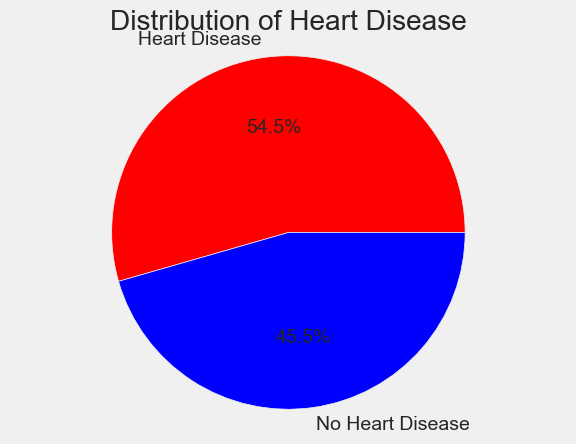

In [499]:
heartDiseaselabels = {'1': "Heart Disease", '0': "No Heart Disease"}
df.target.value_counts().plot(kind="pie", colors=["red", "blue"], autopct='%1.1f%%', labels=[heartDiseaselabels['1'], heartDiseaselabels['0']])
plt.ylabel("")
plt.title("Distribution of Heart Disease")
plt.axis('equal')
plt.show()


In [500]:
categorical_val = []
continuous_val = []

for column in df.columns:
    print('==============================')
    unique_values = df[column].unique()
    print(f"{column} : {unique_values}")
    if len(unique_values) <= 10:
        categorical_val.append(column)
    else:
        continuous_val.append(column)

# Display unique values of categorical columns
if categorical_val:
    print('\nCategorical Columns:')
    for column in categorical_val:
        print(f"{column}: {', '.join(str(value) for value in df[column].unique())}")

# Display names of continuous columns
if continuous_val:
    print('\nContinuous Columns:')
    print(continuous_val)


age : [63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]
sex : [1 0]
cp : [3 2 1 0]
trestbps : [145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]
chol : [233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 167 230 335 276 353 225 330 290 172 305 188 282 185 326 274 164 307
 249 341 407 217 174 281 289 322 299 300 293 184 409 259 200 327 237 218
 319 166 311 169 187 176 241 131]
fbs :

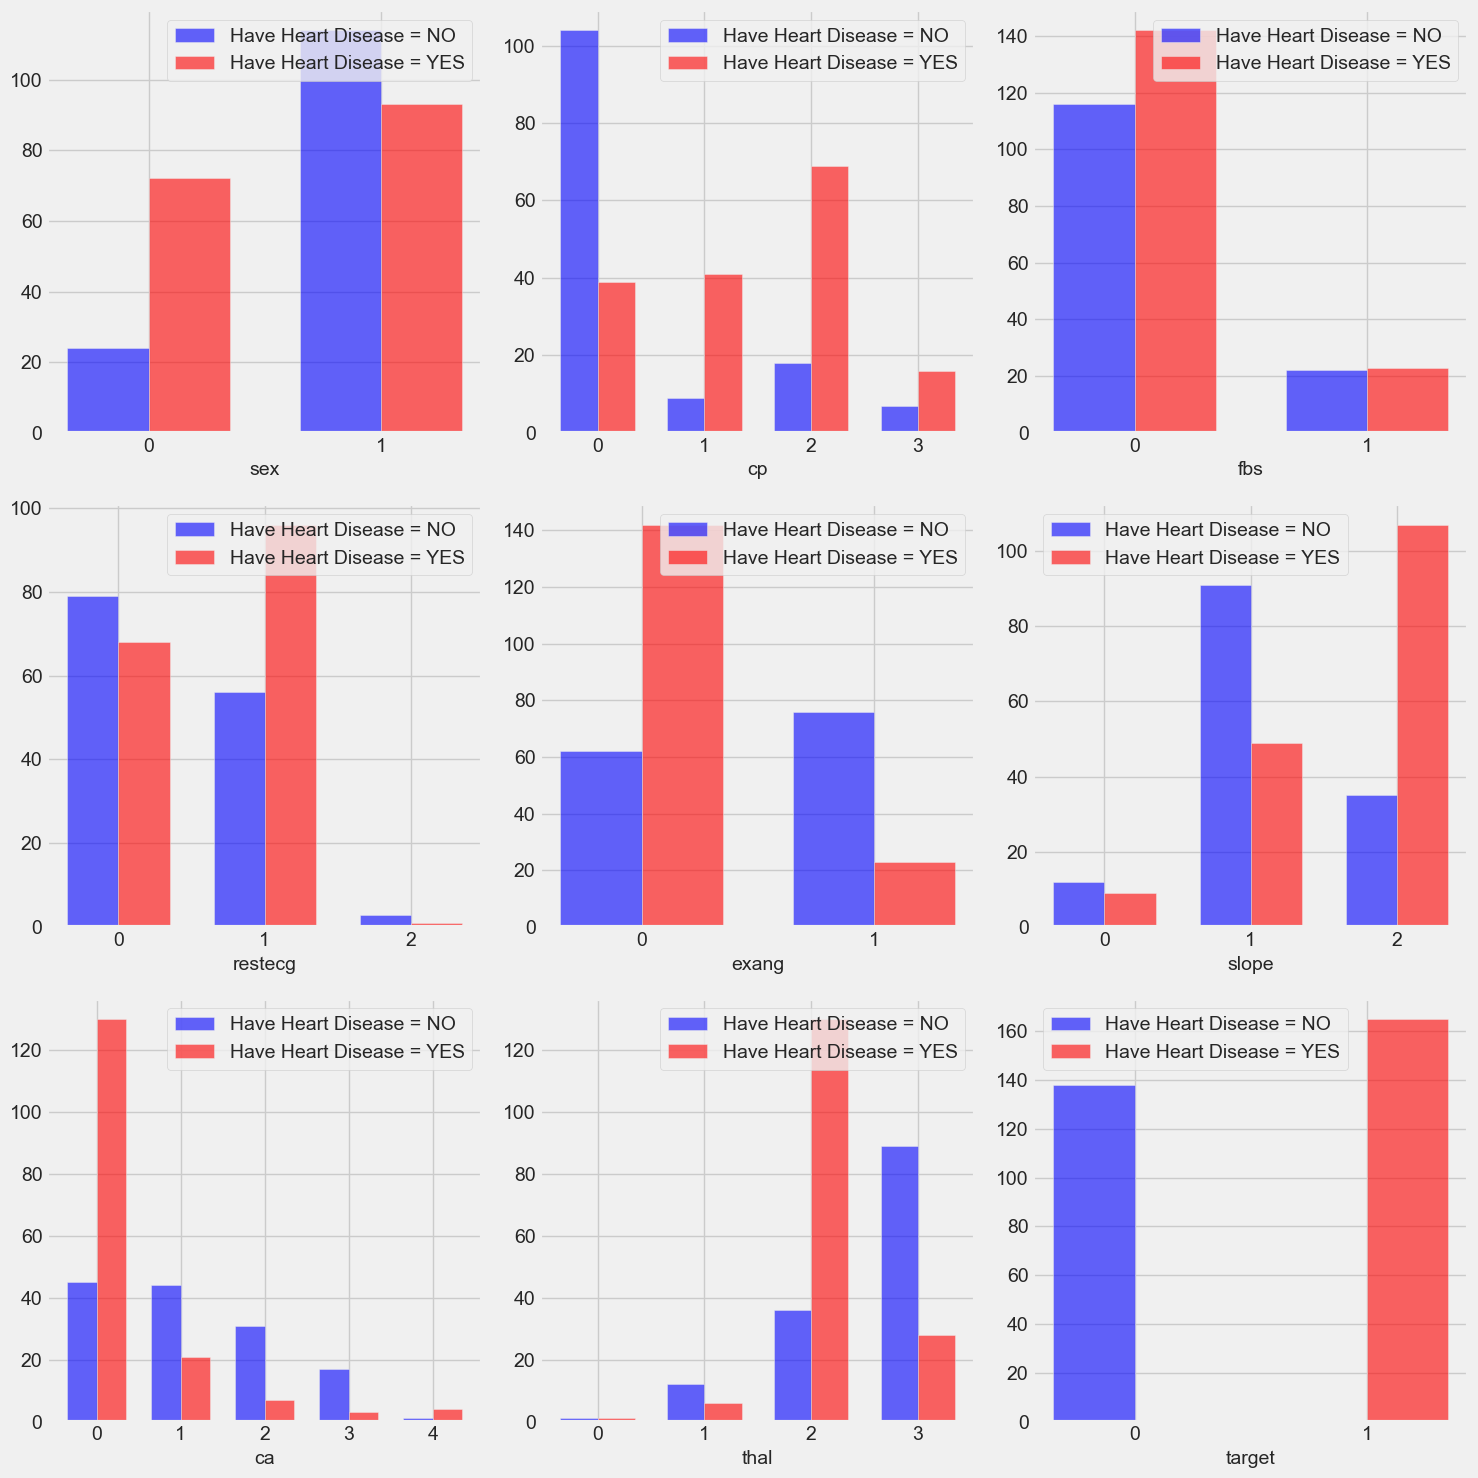

In [501]:
plt.figure(figsize=(15, 15))

for i, column in enumerate(categorical_val, 1):
    plt.subplot(3, 3, i)
    counts_no = df[df["target"] == 0][column].value_counts()
    counts_yes = df[df["target"] == 1][column].value_counts()
    labels = sorted(list(set(counts_no.index) | set(counts_yes.index)))
    x = np.arange(len(labels))
    width = 0.35
    
    plt.bar(x - width/2, counts_no.reindex(labels), width, label='Have Heart Disease = NO', color='blue', alpha=0.6)
    plt.bar(x + width/2, counts_yes.reindex(labels), width, label='Have Heart Disease = YES', color='red', alpha=0.6)
    
    plt.xticks(x, labels)
    plt.legend()
    plt.xlabel(column)

plt.tight_layout()
plt.show()


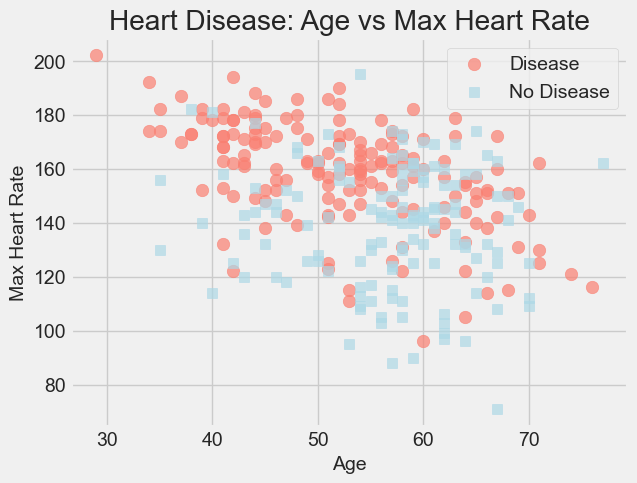

In [502]:


# Scatter with positive examples
plt.scatter(df.age[df.target == 1],
            df.thalach[df.target == 1],
            c="salmon",
            marker="o",
            s=80,
            alpha=0.7,
            label="Disease")

# Scatter with negative examples
plt.scatter(df.age[df.target == 0],
            df.thalach[df.target == 0],
            c="lightblue",
            marker="s",
            s=60,
            alpha=0.7,
            label="No Disease")

# Add some helpful info
plt.title("Heart Disease: Age vs Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend()
plt.grid(True)
plt.show()


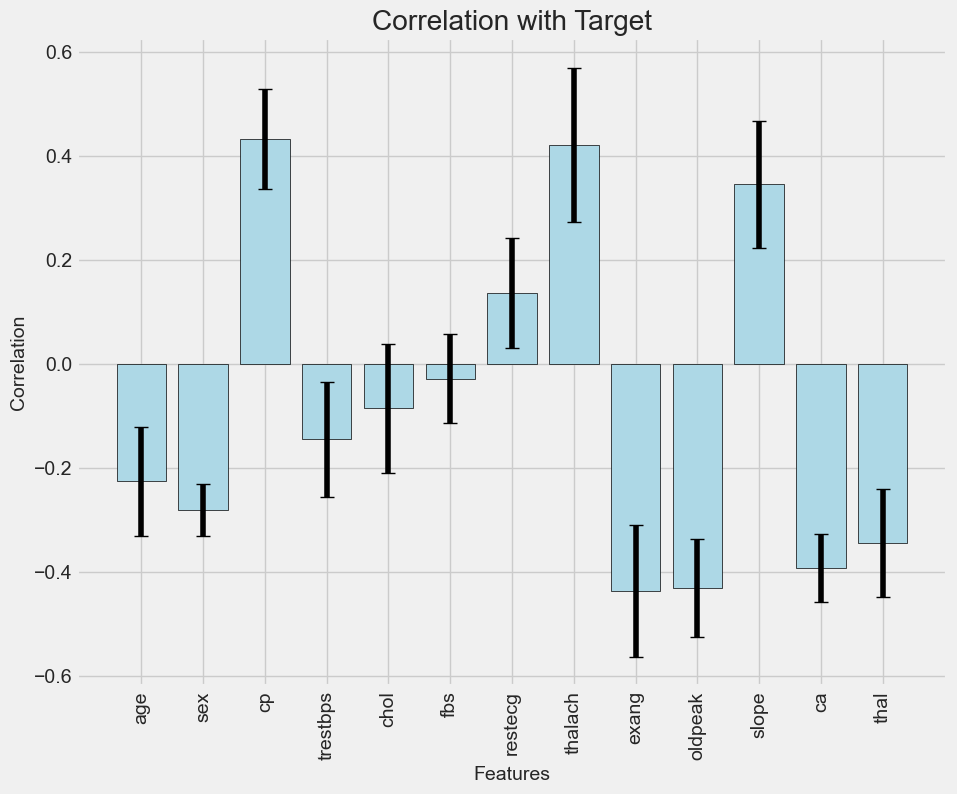

In [503]:


import numpy as np
import matplotlib.pyplot as plt

correlation = df.drop('target', axis=1).corrwith(df['target'])
features = correlation.index
correlation_values = correlation.values

fig, ax = plt.subplots(figsize=(10, 8))
ax.bar(features, correlation_values, color='lightblue', edgecolor='black')
ax.errorbar(features, correlation_values, yerr=np.random.uniform(0.05, 0.15, len(features)), fmt='none', color='black', capsize=5)
ax.set_title("Correlation with Target")
ax.set_xlabel("Features")
ax.set_ylabel("Correlation")
plt.xticks(rotation=90)
plt.show()

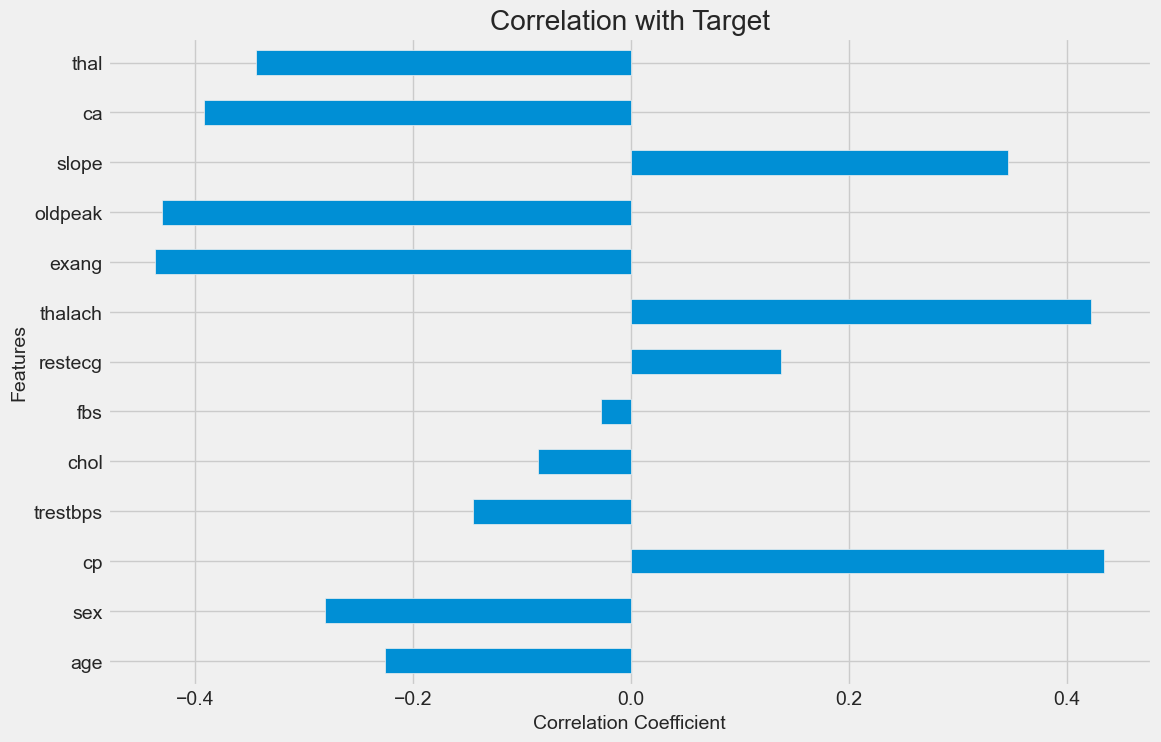

In [504]:
correlation = df.drop('target', axis=1).corrwith(df['target'])
correlation.plot(kind='barh', grid=True, figsize=(12, 8))
plt.title("Correlation with Target")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Features")
plt.show()


In [505]:
categorical_val.remove('target')
dataset = pd.get_dummies(df, columns = categorical_val)

from sklearn.preprocessing import StandardScaler

s_sc = StandardScaler()
col_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[col_to_scale] = s_sc.fit_transform(dataset[col_to_scale])

In [506]:

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [507]:

from sklearn.model_selection import train_test_split

X = dataset.drop('target', axis=1)
y = dataset.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



In [508]:

from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train, y_train)

print_score(lr_clf, X_train, y_train, X_test, y_test, train=True)
print_score(lr_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 86.79%
_______________________________________________
CLASSIFICATION REPORT:
              0      1  accuracy  macro avg  weighted avg
precision  0.88   0.86      0.87       0.87          0.87
recall     0.82   0.90      0.87       0.86          0.87
f1-score   0.85   0.88      0.87       0.87          0.87
support   97.00 115.00      0.87     212.00        212.00
_______________________________________________
Confusion Matrix: 
 [[ 80  17]
 [ 11 104]]

Test Result:
Accuracy Score: 86.81%
_______________________________________________
CLASSIFICATION REPORT:
              0     1  accuracy  macro avg  weighted avg
precision  0.87  0.87      0.87       0.87          0.87
recall     0.83  0.90      0.87       0.86          0.87
f1-score   0.85  0.88      0.87       0.87          0.87
support   41.00 50.00      0.87      91.00         91.00
_______________________________________________
Confusion Matrix: 
 [[34  7]
 [ 5 45]]



In [509]:
test_score = accuracy_score(y_test, lr_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, lr_clf.predict(X_train)) * 100

results_df = pd.DataFrame(data=[["Logistic Regression", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,86.79,86.81


In [511]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import joblib
from sklearn.exceptions import DataConversionWarning

data = pd.read_csv('heart.csv')


X = data.drop('target', axis=1)
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

    
lr_model = LogisticRegression(solver='liblinear')
lr_model.fit(X_train_scaled, y_train)

accuracy = lr_model.score(X_test_scaled, y_test)
print("Accuracy:", accuracy)

joblib.dump(lr_model, 'heart_disease_model.joblib')

model = joblib.load('heart_disease_model.joblib')

def predict_heart_disease(age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal):
    input_data = [[age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal]]
    input_data_scaled = scaler.transform(input_data)
    prediction = model.predict(input_data_scaled)
    return prediction[0]

age = float(input("Enter age: "))
sex = float(input("Enter sex (0 for female, 1 for male): "))
cp = float(input("Enter chest pain type (0-3): "))
trestbps = float(input("Enter resting blood pressure: "))
chol = float(input("Enter cholesterol level: "))
fbs = float(input("Enter fasting blood sugar (0 or 1): "))
restecg = float(input("Enter resting electrocardiographic results (0-2): "))
thalach = float(input("Enter maximum heart rate achieved: "))
exang = float(input("Enter exercise-induced angina (0 or 1): "))
oldpeak = float(input("Enter ST depression induced by exercise relative to rest: "))
slope = float(input("Enter the slope of the peak exercise ST segment (0-2): "))
ca = float(input("Enter number of major vessels colored by fluoroscopy (0-3): "))
thal = float(input("Enter thalassemia type (1-3): "))

prediction = predict_heart_disease(age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal)

if prediction == 1:
    print("The model predicts that the person has heart disease.")
else:
    print("The model predicts that the person does not have heart disease.")


Accuracy: 0.8524590163934426
Enter age: 63
Enter sex (0 for female, 1 for male): 1
Enter chest pain type (0-3): 3
Enter resting blood pressure: 145
Enter cholesterol level: 233
Enter fasting blood sugar (0 or 1): 1
Enter resting electrocardiographic results (0-2): 0
Enter maximum heart rate achieved: 150
Enter exercise-induced angina (0 or 1): 0
Enter ST depression induced by exercise relative to rest: 2.3
Enter the slope of the peak exercise ST segment (0-2): 0
Enter number of major vessels colored by fluoroscopy (0-3): 0
Enter thalassemia type (1-3): 1
The model predicts that the person has heart disease.


C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
